In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import sklearn
import pandas as pd

import shelter
from shelter.config import data_dir

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

%matplotlib inline

In [104]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Machine Learning Model

In this hackathon we'll try to predict the outcome of animals (adoption, etc.) at the Austin Animal Center using intake data (breed, age, etc.).
We'll use the data from [this Kaggle competition](https://www.kaggle.com/c/shelter-animal-outcomes).
At the end of the hackathon you should be able to send your own submission to Kaggle!

To start, read the documentation on [Kaggle](https://www.kaggle.com/c/shelter-animal-outcomes) and download the [data](https://www.kaggle.com/c/shelter-animal-outcomes/data).
Unzip the data in the folder `data/`.
There should be (at least) three files: `sample_submission.csv`, `train.csv` and `test.csv`.

Load the data with the functions from our own `shelter` package:

In [69]:
data_dir = "/Users/janellezoutkamp/Documents/practice/accelerator/ml-production/data"

train = shelter.data.load_data(os.path.join(data_dir, 'train.csv'))
test = shelter.data.load_data(os.path.join(data_dir, 'test.csv'))

train.head()

,id,name,date_time,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


Text(0.5,1,'Occurrence of outcome types')

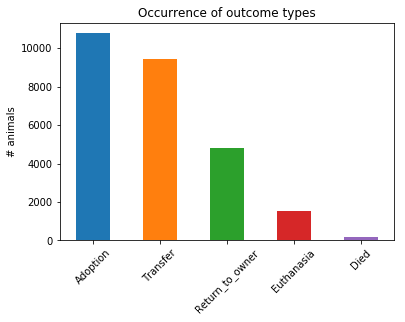

In [6]:
ax = train['outcome_type'].value_counts().plot(kind='bar', rot=45)
ax.set_ylabel('# animals')
ax.set_title('Occurrence of outcome types')

Now that you've got the data, try to create a model that is able to predict the `outcome_type` given the intake data.
Our final metric is the `f1-score` over all classes.

> #### Tips
> 
* First create a baseline model that randomly predicts a class given the class occurrences.
* `sklearn` doesn't work with string values, you probably want to look at [`pd.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), `sklearn`'s [`LabelEncoder`](http://scikit-learn.org/stable/modules/preprocessing_targets.html) or [`OneHotEncoder`](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).
* Try to a create model that predicts only one outcome type (e.g. `Adoption`) before focussing on all outcomes.
* `sklearn` has many models for [supervised learning](http://scikit-learn.org/stable/supervised_learning.html), try to find one that fits the problem.
* Look at [Kaggle Kernels](https://www.kaggle.com/c/shelter-animal-outcomes/kernels) for inspiration.
* You will get better performance with some [feature engineering](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/).
* Once you got your first model working, generate predictions for `test.csv` and submit it on Kaggle.

# Pepare train-test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train[['animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color']]
                                                    , train['outcome_type']
                                                    , test_size=0.20 
                                                    , random_state=42)
        
#X_train.head()


# Baseline Model: stratified dummy classification

In [112]:
# X = pd.get_dummies(train[['animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color']])
X = [[0]]*len(X_train)
y = y_train #['outcome_type'].tolist()

prediction = DummyClassifier(strategy = "stratified", random_state=None, constant=None)
prediction.fit(X,y)
y_pred = prediction.predict([[0]]*len(X_test))

In [113]:
# F1 _score
f1_score(y_test,y_pred, average = 'macro')

0.20450152803069913

In [114]:
# Accuracy
accuracy_score(y_test,y_pred)

0.32267115600448931

# Simple Model:
### Using animal type as a single predictor

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
X = pd.get_dummies(X_train[['animal_type']])
y = y_train

prediction = RandomForestClassifier()
prediction.fit(X,y)
y_pred = prediction.predict(pd.get_dummies(X_test[['animal_type']]))

In [121]:
# F1 _score
f1_score(y_test,y_pred, average = 'macro')

/Users/janellezoutkamp/anaconda/envs/ml-production/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.20433834483671939

In [122]:
# Accuracy
accuracy_score(y_test,y_pred)

0.44725028058361394

# Second Model:
### Clean dataset

In [151]:
?f1_score

In [133]:
X_test.head(20)

,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
3197,Dog,Spayed Female,9 years,Pit Bull Mix,Red/White
17183,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
6235,Cat,Unknown,8 months,Domestic Shorthair Mix,Brown Tabby/White
1968,Dog,Spayed Female,5 years,Bull Terrier Mix,Red/White
23186,Cat,Spayed Female,11 years,Maine Coon Mix,Torbie
4972,Cat,Spayed Female,8 years,Domestic Medium Hair Mix,White/Blue
13685,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Orange Tabby
23426,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Orange Tabby/White
5325,Dog,Neutered Male,6 years,German Shepherd/Cardigan Welsh Corgi,Sable
16207,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico


In [150]:
# counting bread class frequency
temp = test.groupby('breed').count()
temp.sort_values('id', ascending=0).head()

,id,name,date_time,animal_type,sex_upon_outcome,age_upon_outcome,color
breed,,,,,,,
Domestic Shorthair Mix,3777,3777,3777,3777,3777,3777,3777
Pit Bull Mix,870,870,870,870,870,870,870
Chihuahua Shorthair Mix,732,732,732,732,732,732,732
Labrador Retriever Mix,586,586,586,586,586,586,586
Domestic Medium Hair Mix,378,378,378,378,378,378,378


In [10]:
train_clean = train[['outcome_type', 'animal_type', 'sex_upon_outcome', 'age_upon_outcome', 'breed', 'color']]
train_clean.head()

,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [39]:
# train_clean['age_upon_outcome'].str.split('')
train_clean['age'], train_clean['unit'] = train_clean.age_upon_outcome.str.split(' ', 1).str
train_clean.head()

/Users/janellezoutkamp/anaconda/envs/ml-production/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,age,unit
0,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,year
1,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,year
2,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2,years
3,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,3,weeks
4,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2,years


In [46]:
?DummyClassifier